In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [119]:
# Read the data 
data = pd.read_csv("vocal_gender_features_new.csv")

In [120]:
data.head()

,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
0,2247.331739,1158.537748,1870.415462,370.405241,21.440710,0.036879,4419.438073,0.169241,0.082552,1592.1033,...,21.736240,2.303085,8.983318,-17.410305,9.115154,0.301804,10.452693,-3.080832,10.146248,0
1,1790.719889,996.554825,1757.898617,410.710318,21.513383,0.018936,3635.742188,0.108068,0.055477,1112.6351,...,13.937135,-0.953942,10.831742,-0.088775,10.297690,-7.281142,10.926579,-0.450248,8.489134,0
2,1977.923363,1010.148667,1747.099555,461.458379,20.476283,0.032616,3873.291016,0.144633,0.060388,1557.5225,...,14.900779,0.260098,14.031009,-0.420670,10.810292,-0.199829,11.986182,3.372986,9.285437,0
3,2037.765550,1311.440630,1745.224852,419.056484,19.516014,0.028482,3826.584507,0.148933,0.029559,1481.0868,...,15.957924,-1.486122,14.461978,-8.479608,12.550333,3.997028,9.912608,-6.946966,10.574301,0
4,1739.383829,1092.623322,1623.135563,450.088465,20.260620,0.025737,3452.903892,0.117961,0.069078,1424.5352,...,15.105562,-3.366364,13.943447,-6.561539,11.944948,1.410639,13.110976,-3.252258,9.866687,0


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16148 entries, 0 to 16147
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_spectral_centroid   16148 non-null  float64
 1   std_spectral_centroid    16148 non-null  float64
 2   mean_spectral_bandwidth  16148 non-null  float64
 3   std_spectral_bandwidth   16148 non-null  float64
 4   mean_spectral_contrast   16148 non-null  float64
 5   mean_spectral_flatness   16148 non-null  float64
 6   mean_spectral_rolloff    16148 non-null  float64
 7   zero_crossing_rate       16148 non-null  float64
 8   rms_energy               16148 non-null  float64
 9   mean_pitch               16148 non-null  float64
 10  min_pitch                16148 non-null  float64
 11  max_pitch                16148 non-null  float64
 12  std_pitch                16148 non-null  float64
 13  spectral_skew            16148 non-null  float64
 14  spectral_kurtosis     

In [122]:
# checking the missing value
data.isnull().sum()

mean_spectral_centroid     0
std_spectral_centroid      0
mean_spectral_bandwidth    0
std_spectral_bandwidth     0
mean_spectral_contrast     0
mean_spectral_flatness     0
mean_spectral_rolloff      0
zero_crossing_rate         0
rms_energy                 0
mean_pitch                 0
min_pitch                  0
max_pitch                  0
std_pitch                  0
spectral_skew              0
spectral_kurtosis          0
energy_entropy             0
log_energy                 0
mfcc_1_mean                0
mfcc_1_std                 0
mfcc_2_mean                0
mfcc_2_std                 0
mfcc_3_mean                0
mfcc_3_std                 0
mfcc_4_mean                0
mfcc_4_std                 0
mfcc_5_mean                0
mfcc_5_std                 0
mfcc_6_mean                0
mfcc_6_std                 0
mfcc_7_mean                0
mfcc_7_std                 0
mfcc_8_mean                0
mfcc_8_std                 0
mfcc_9_mean                0
mfcc_9_std    

In [123]:
data.duplicated().sum()

1078

In [124]:
data = data.drop_duplicates()

### Check the outlier

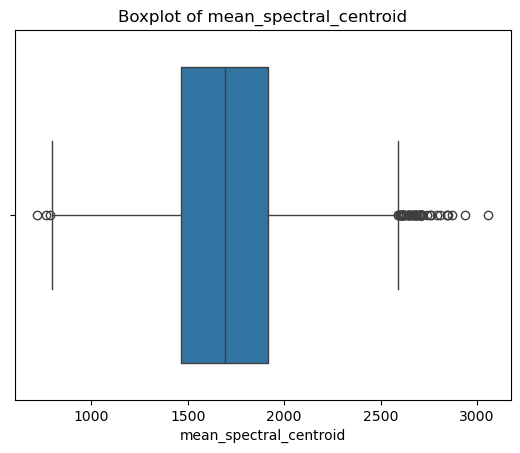

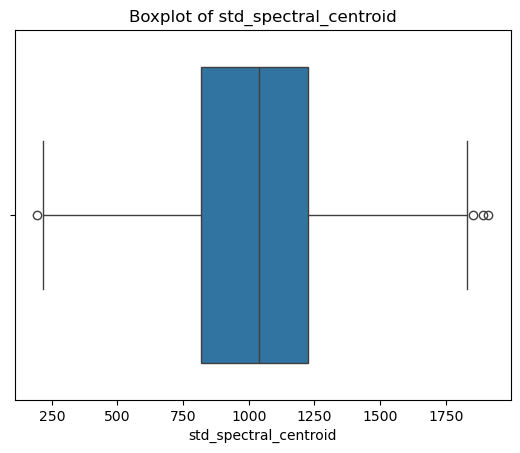

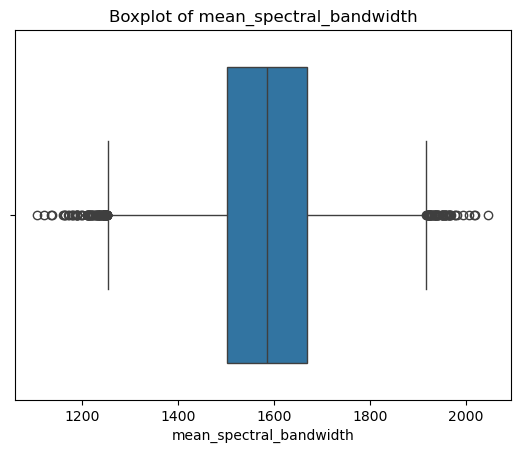

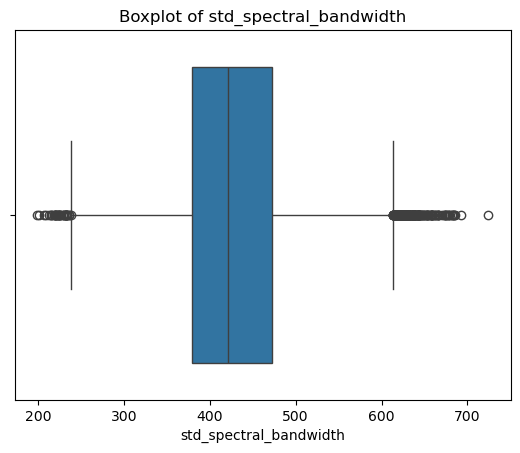

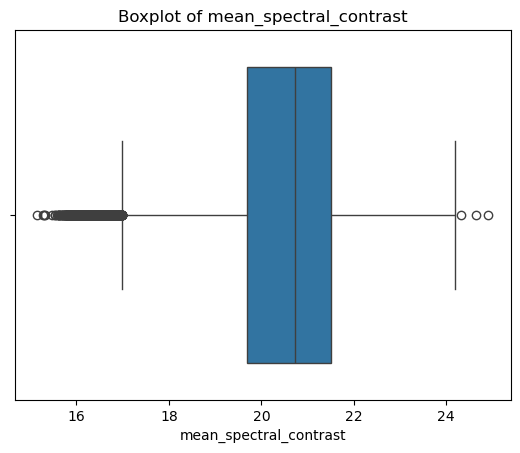

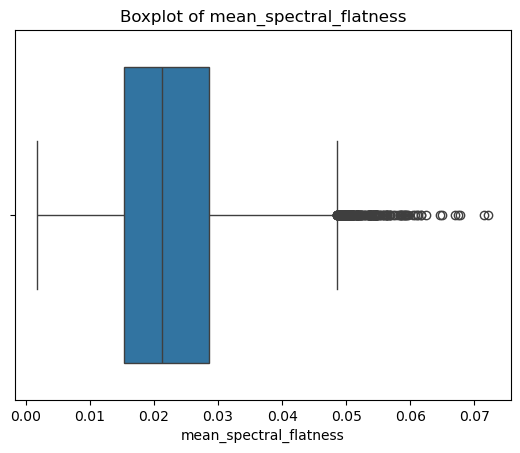

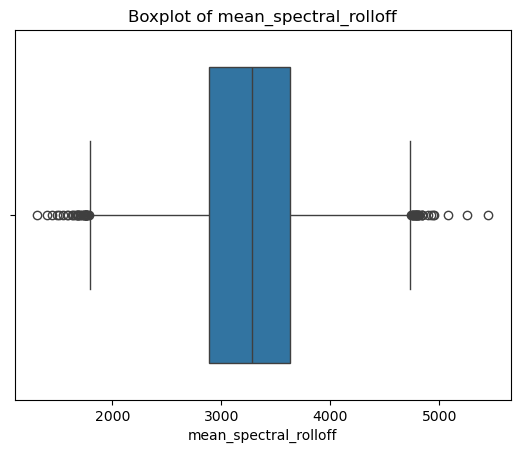

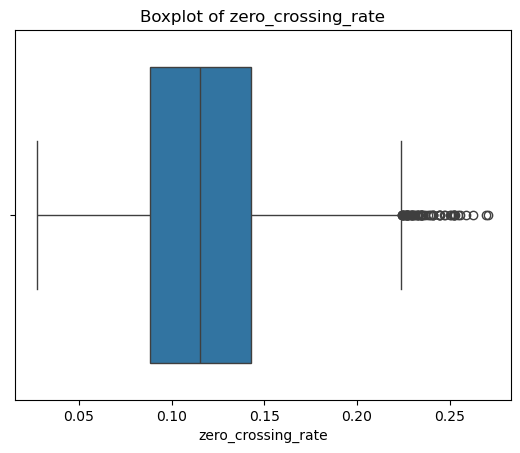

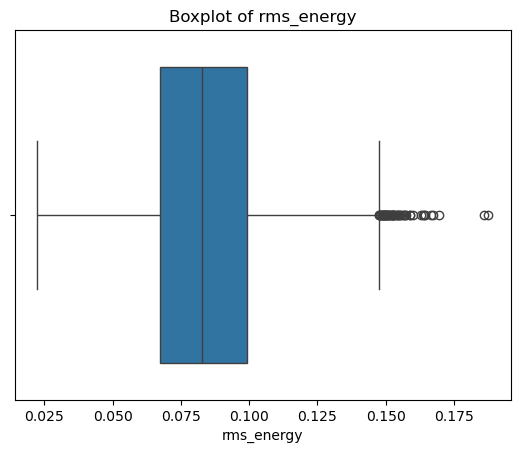

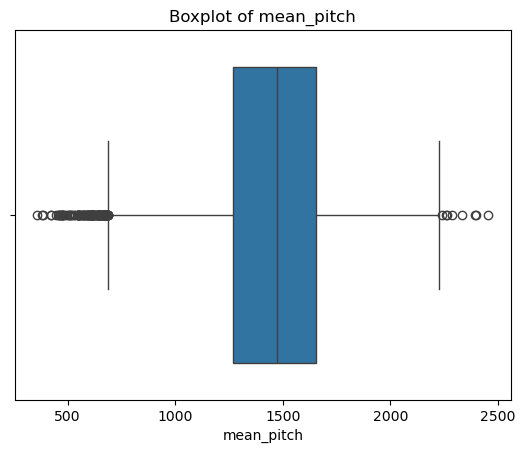

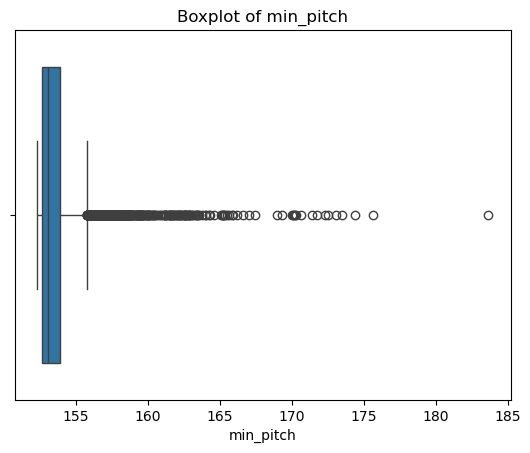

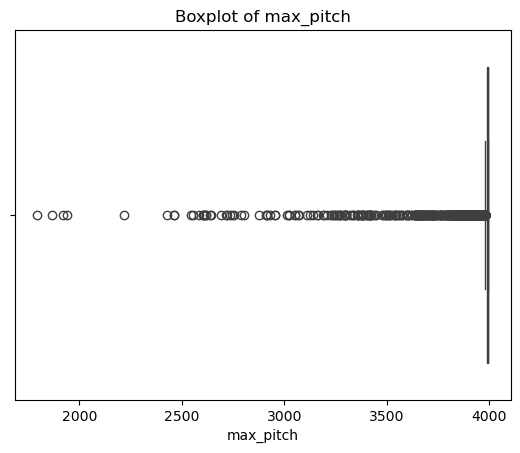

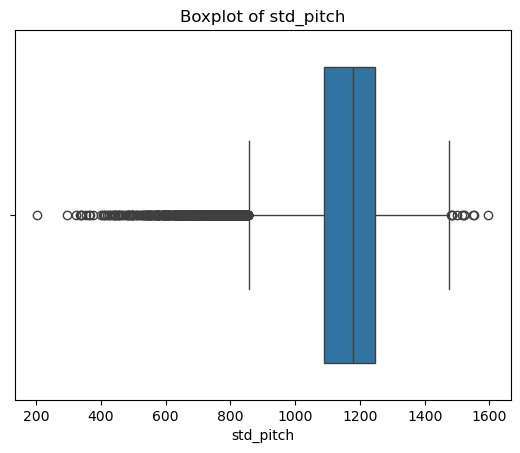

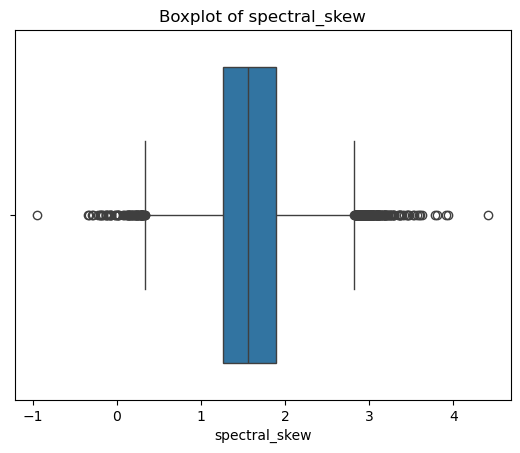

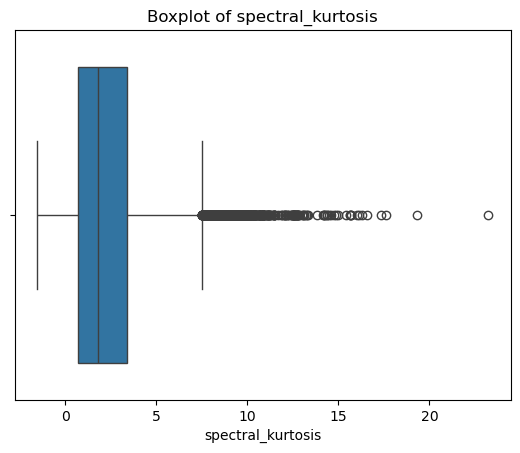

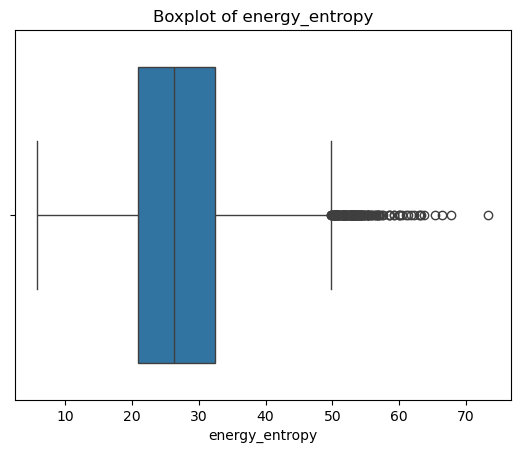

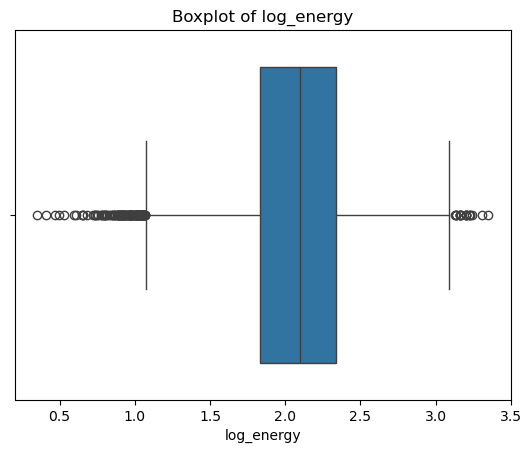

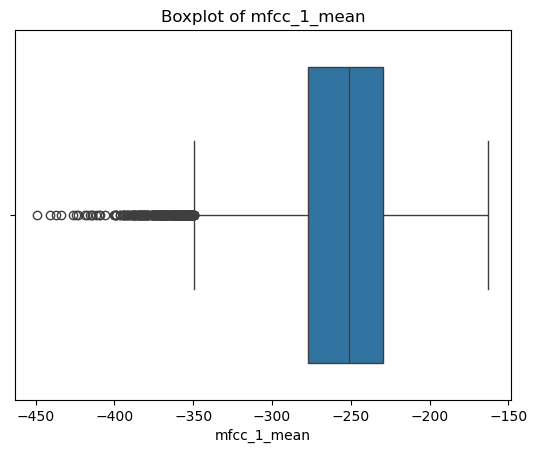

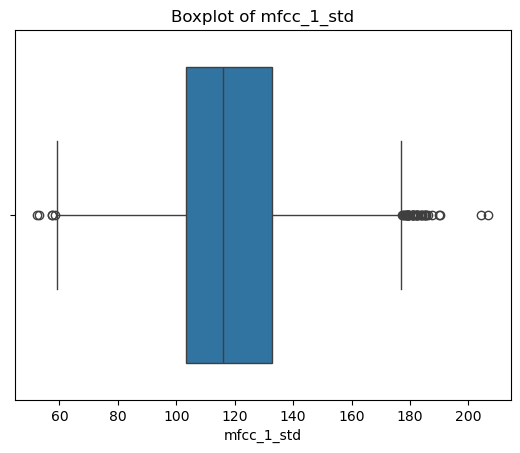

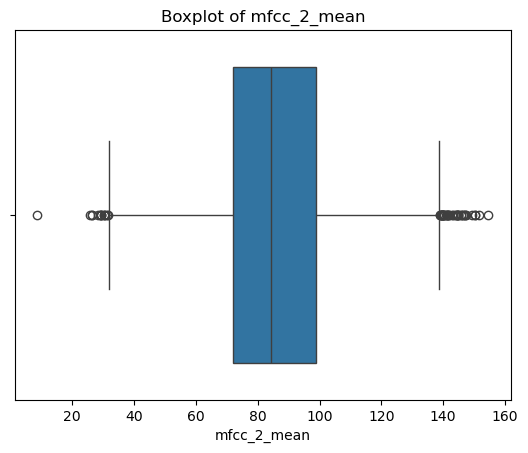

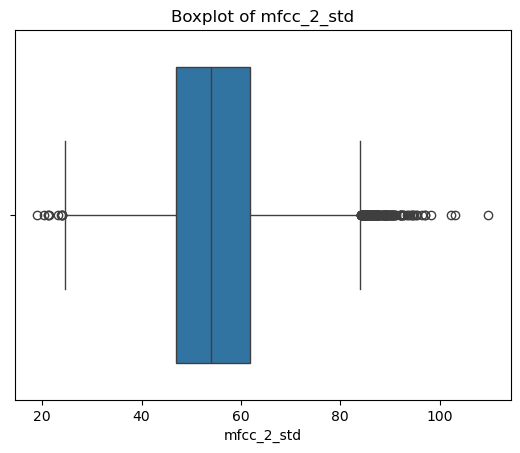

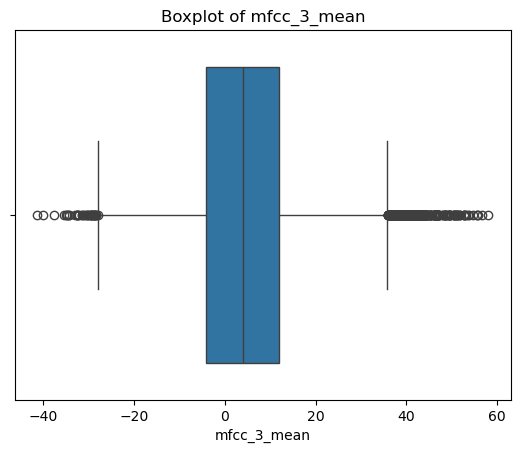

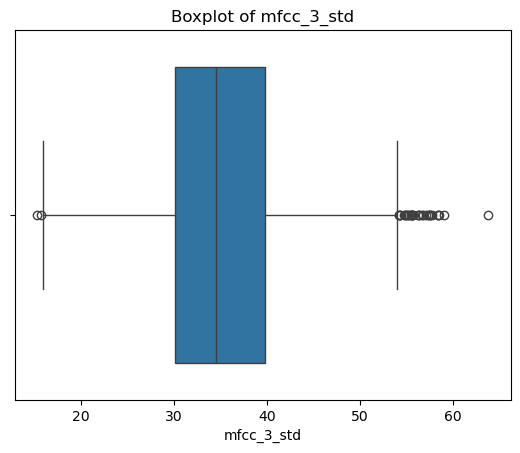

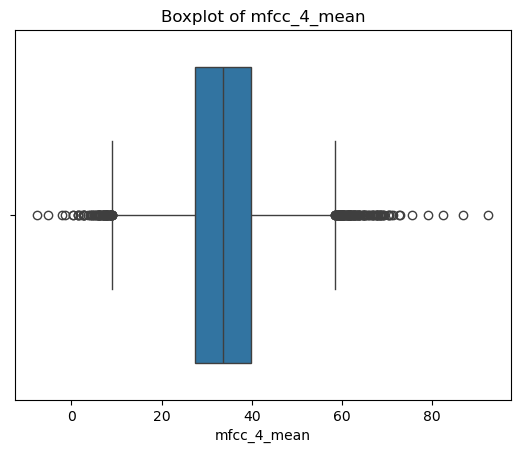

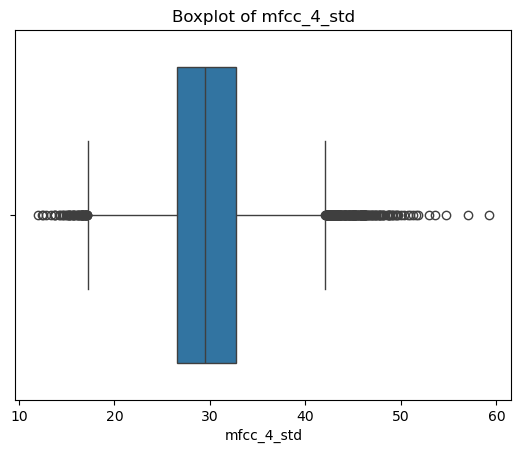

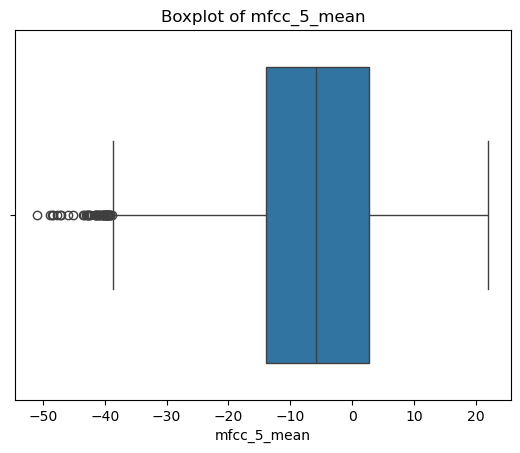

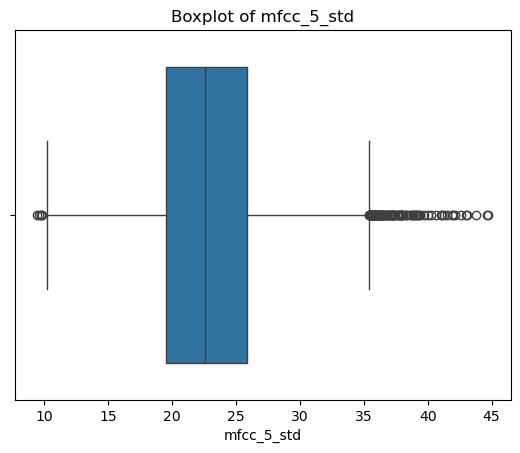

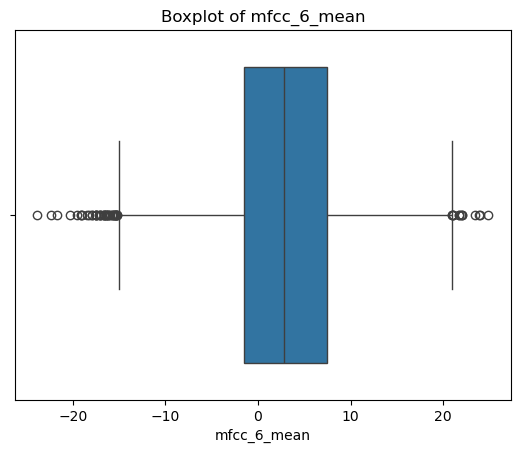

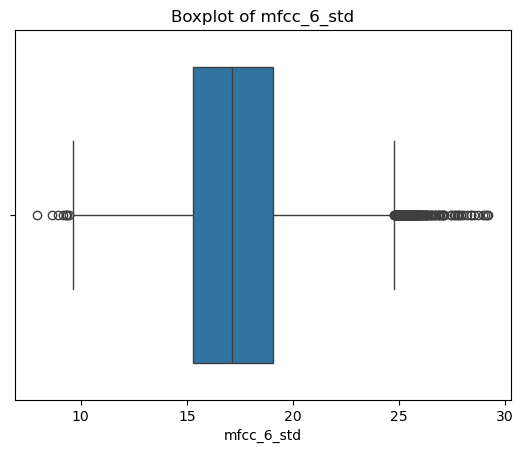

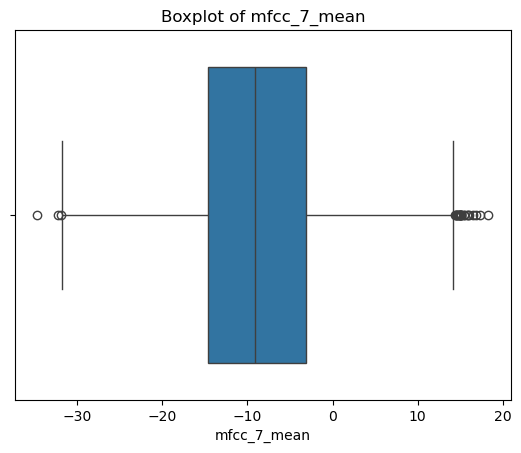

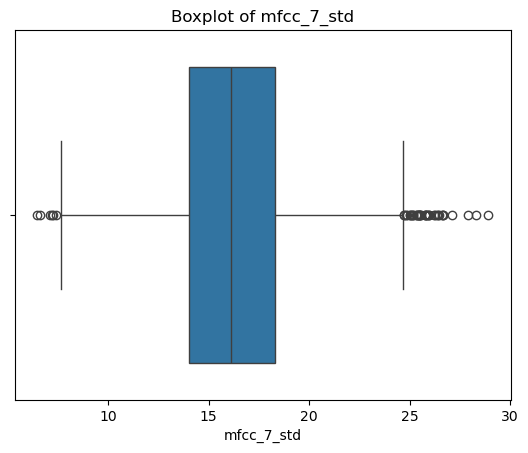

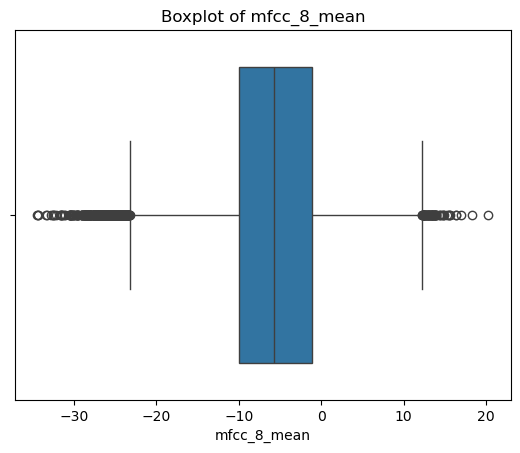

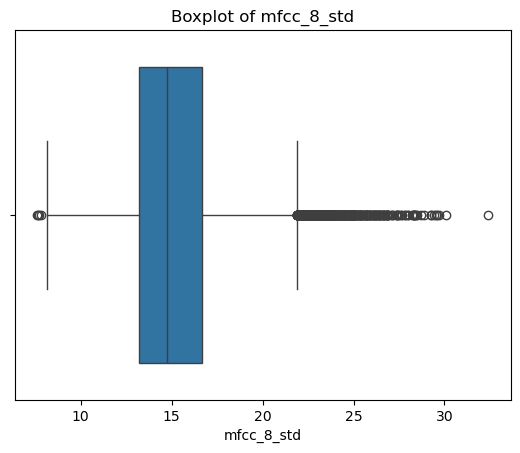

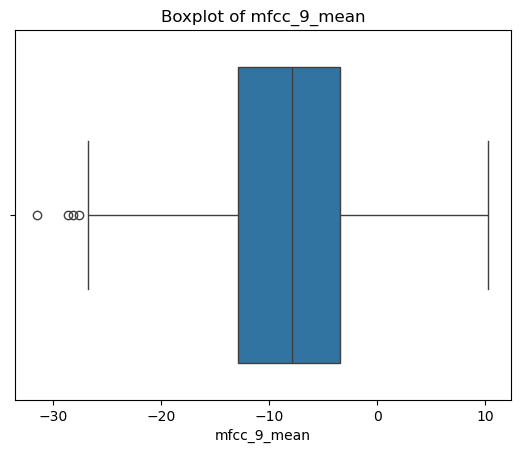

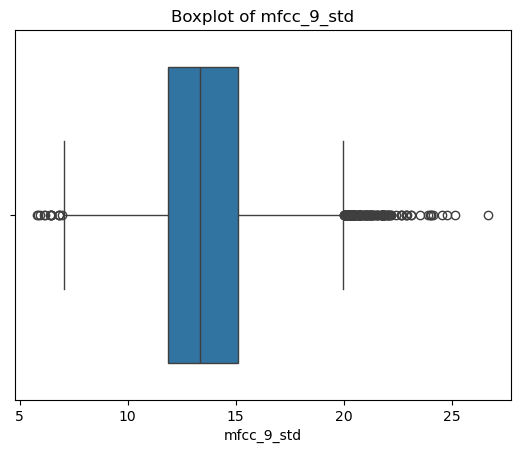

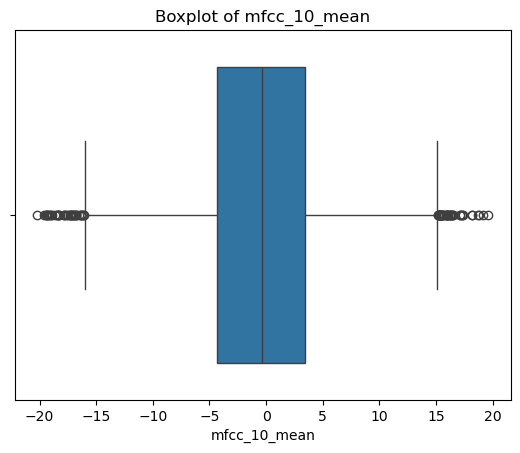

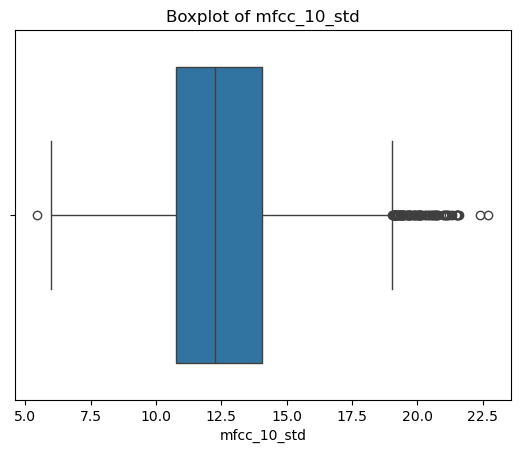

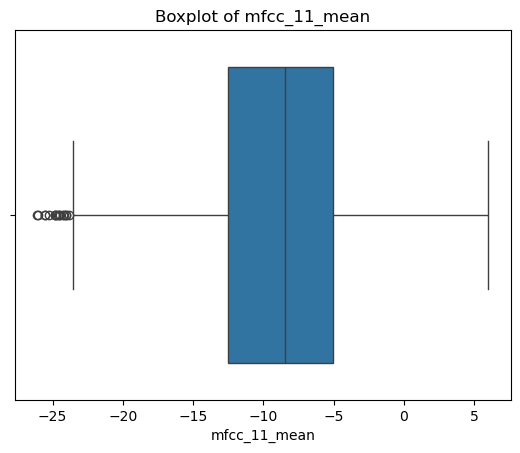

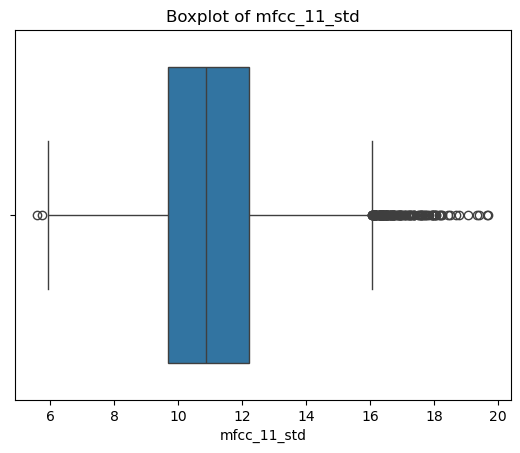

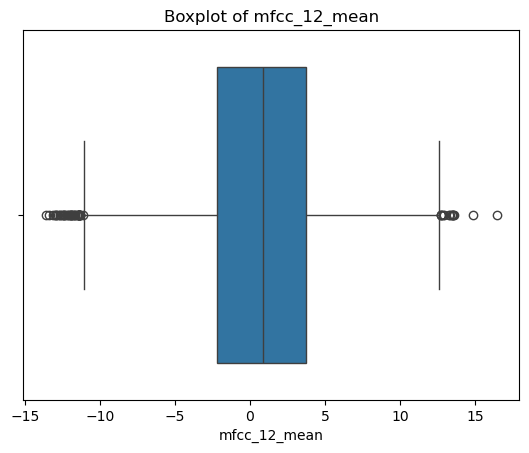

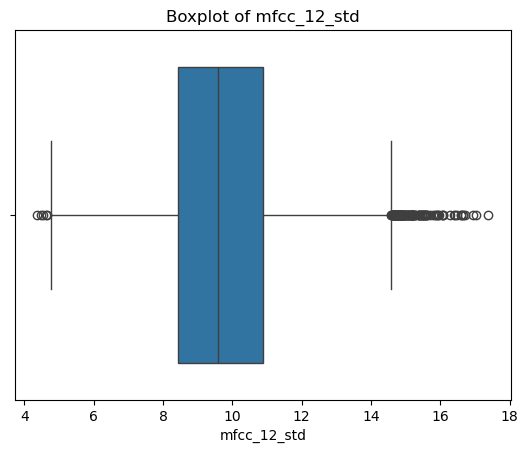

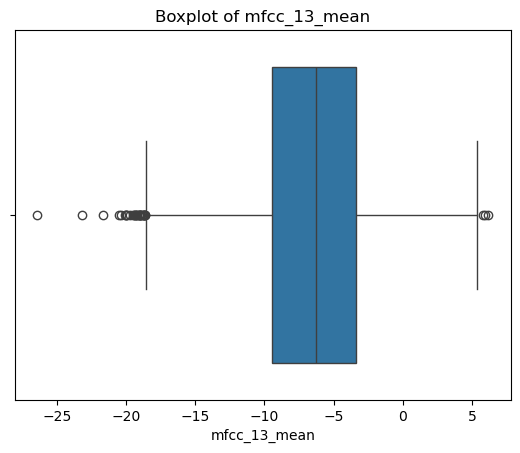

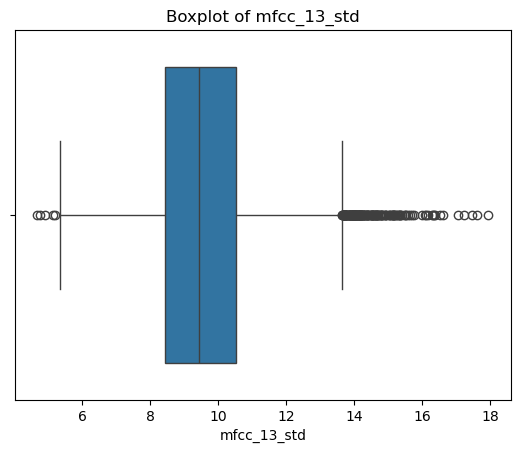

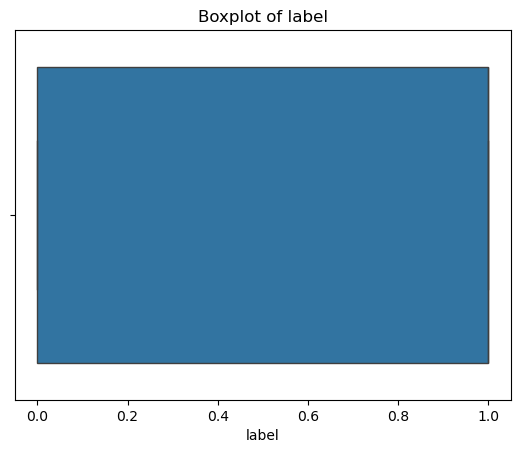

In [125]:
for col in data.select_dtypes(include='number').columns:
    plt.figure()
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [126]:
X = data.columns.drop('label')

### Handle the Outlier

In [127]:
# Function to cap outliers using IQR
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.clip(lower, upper)

### Feature Selection

In [128]:
# Apply capping
data[X] = data[X].apply(cap_outliers)

In [129]:
# Split into X and y
X = data.drop('label', axis=1)
y = data['label']

In [130]:
from sklearn.feature_selection import VarianceThreshold

# Remove features with low variance
selector = VarianceThreshold(threshold=0.01)
X_selected = selector.fit_transform(X)

In [131]:
print("Original features:", data.shape[1])
print("Selected features:", X_selected.shape[1])


Original features: 44
Selected features: 40


### Train_Test_split 

In [132]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

### Scale the feature 

In [133]:
# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### KMeans Cluster 

In [138]:
from sklearn.cluster import KMeans

# Fit KMeans on training data
kmeans = KMeans(n_clusters=2, random_state=42)
train_clusters = kmeans.fit_predict(X_train_scaled)

In [139]:
# Predict on test data (not full dataset!)
test_clusters = kmeans.predict(X_test_scaled)

In [140]:
# Now reshape and stack
X_train_final = np.hstack([X_train_scaled, train_clusters.reshape(-1, 1)])
X_test_final = np.hstack([X_test_scaled, test_clusters.reshape(-1, 1)])

### 1. LogisticRegression 

In [141]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_final, y_train)

LogisticRegression(max_iter=1000)

### Confusion Matrix

In [142]:
# Predict and evaluate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = model.predict(X_test_final)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9917053749170538
Confusion Matrix:
 [[1033   13]
 [  12 1956]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1046
           1       0.99      0.99      0.99      1968

    accuracy                           0.99      3014
   macro avg       0.99      0.99      0.99      3014
weighted avg       0.99      0.99      0.99      3014



In [143]:
# Check for imbalance data
print(y.value_counts(normalize=True))

label
1    0.653019
0    0.346981
Name: proportion, dtype: float64


### 2. K-Nearest neighbors 

In [144]:
from sklearn.neighbors import KNeighborsClassifier
model_kn = KNeighborsClassifier(n_neighbors=5)
model_kn.fit(X_train_final, y_train)



KNeighborsClassifier()

In [145]:
print("KNN:", accuracy_score(y_test, model_kn.predict(X_test_final)))

KNN: 0.9983410749834107


### 3. Support Vector Machine 

In [146]:
from sklearn.svm import SVC
model_svc = SVC(kernel = 'rbf')
model_svc.fit(X_train_final, y_train)

SVC()

In [147]:
print('SVM:',accuracy_score(y_test,model_svc.predict(X_test_final)))

SVM: 0.9986728599867286


### 4. Decision Tree

In [148]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state = 42)
model_dt.fit(X_train_final, y_train)
print('Decision Tree:', accuracy_score(y_test, model_dt.predict(X_test_final)))

Decision Tree: 0.9545454545454546


### 5. Random Forest

In [149]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators = 100, random_state= 42)
model_rf.fit(X_train_final, y_train)

RandomForestClassifier(random_state=42)

In [150]:
print("Random Forest:", accuracy_score(y_test, model_rf.predict(X_test_final)))

Random Forest: 0.9940278699402787


### 6. gradient Boosting 

In [151]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier(random_state = 42)
model_gb.fit(X_train_final, y_train)

GradientBoostingClassifier(random_state=42)

In [152]:
print('Grandient Boosting:', accuracy_score(y_test, model_gb.predict(X_test_final)) )

Grandient Boosting: 0.9917053749170538


### 7. Naive Bayes 

In [153]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train_final, y_train)

GaussianNB()

In [154]:
print('Naive Bayes:', accuracy_score(y_test, model_nb.predict(X_test_final)))

Naive Bayes: 0.9080955540809555


# Ml flow 

In [156]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import accuracy_score, classification_report

# Set MLflow experiment
mlflow.set_experiment("Voice Gender Classification")

# Common function to log model and metrics
def log_model(name, model, X_train, y_train, X_test, y_test):
    with mlflow.start_run(run_name=name):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)

        # Log model
        mlflow.sklearn.log_model(model, name)

        # Log metrics
        mlflow.log_metric("accuracy", acc)
        mlflow.log_metric("precision_0", report['0']['precision'])
        mlflow.log_metric("recall_0", report['0']['recall'])
        mlflow.log_metric("f1_0", report['0']['f1-score'])
        mlflow.log_metric("precision_1", report['1']['precision'])
        mlflow.log_metric("recall_1", report['1']['recall'])
        mlflow.log_metric("f1_1", report['1']['f1-score'])

        # Log params
        mlflow.log_params(model.get_params())


In [157]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_model("Logistic Regression", LogisticRegression(max_iter=1000), X_train_final, y_train, X_test_final, y_test)

# KNN
from sklearn.neighbors import KNeighborsClassifier
log_model("KNN", KNeighborsClassifier(n_neighbors=5), X_train_final, y_train, X_test_final, y_test)

# SVM
from sklearn.svm import SVC
log_model("SVM", SVC(kernel='rbf'), X_train_final, y_train, X_test_final, y_test)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
log_model("Decision Tree", DecisionTreeClassifier(random_state=42), X_train_final, y_train, X_test_final, y_test)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
log_model("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42), X_train_final, y_train, X_test_final, y_test)

# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
log_model("Gradient Boosting", GradientBoostingClassifier(random_state=42), X_train_final, y_train, X_test_final, y_test)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
log_model("Naive Bayes", GaussianNB(), X_train_final, y_train, X_test_final, y_test)


2025/06/13 14:55:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/06/13 14:56:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/06/13 14:56:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/06/13 14:56:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/06/13 14:56:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/06/13 14:57:18 

## save the model

In [159]:
import joblib

# Example: Save Random Forest
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train_final, y_train)
joblib.dump(best_model, "voice_gender_model.pkl")

# Also save the scaler if needed
joblib.dump(scaler, "voice_prediction.pkl")


['voice_prediction.pkl']